In [96]:
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import matplotlib.colors as mcolors

In [35]:
path = "/home/tim-dewachter/Documents/Thèse/CAPERS/run_cigale_27_01/results.fits"
with fits.open(path) as hdulist:
	result = Table(hdulist[1].data)
result.columns

<TableColumns names=('id','bayes.universe.redshift','bayes.universe.redshift_err','best.chi_square','best.reduced_chi_square','best.attenuation.B_B90','best.attenuation.E_BV_factor','best.attenuation.E_BV_lines','best.attenuation.E_BVs','best.attenuation.FUV','best.attenuation.V_B90','best.attenuation.powerlaw_slope','best.attenuation.uv_bump_amplitude','best.attenuation.uv_bump_wavelength','best.attenuation.uv_bump_width','best.dust.alpha','best.dust.gamma','best.dust.qpah','best.dust.umean','best.dust.umin','best.nebular._12logOH','best.nebular.f_dust','best.nebular.f_esc','best.nebular.lines_width','best.nebular.logU','best.nebular.ne','best.nebular.zgas','best.param.D_4000','best.param.EW(486.3)','best.param.EW(656.5)','best.param.IRX','best.param.beta0_calz94','best.param.beta_calz94','best.param.restframe_FUV-NUV','best.param.restframe_NUV-r_prime','best.sfh.age','best.sfh.age_burst','best.sfh.age_main','best.sfh.f_burst','best.sfh.tau_burst','best.sfh.tau_main','best.stellar.age

In [36]:
result = result["id", "bayes.universe.redshift", "bayes.universe.redshift_err", "best.universe.redshift", "best.chi_square", "best.reduced_chi_square"]

In [37]:
result = result.to_pandas()
result.to_csv(path.replace("results.fits","CAPERS_v0.1_cigale_redshift_with_photometry.csv"))

In [40]:
result[result["bayes.universe.redshift"] > 10]

,id,bayes.universe.redshift,bayes.universe.redshift_err,best.universe.redshift,best.chi_square,best.reduced_chi_square
635,82699,10.280517,0.183455,10.32,151.387169,0.571272
672,95095,11.635938,6.379060,3.86,9.619814,0.687130
689,98574,10.596180,1.318118,11.44,156.911306,0.651084
855,119518,11.744401,7.061944,6.15,555.061621,1.934013
896,126973,11.005632,0.011540,11.01,286.937546,0.880177
976,134065,10.504416,6.698644,6.93,441.689965,2.026101
1008,136645,10.569434,0.014756,10.57,233.549342,0.665383
1150,151513,10.384260,3.408864,3.63,175.149290,0.603963
1174,153207,10.280819,1.010026,10.04,185.142490,0.683183


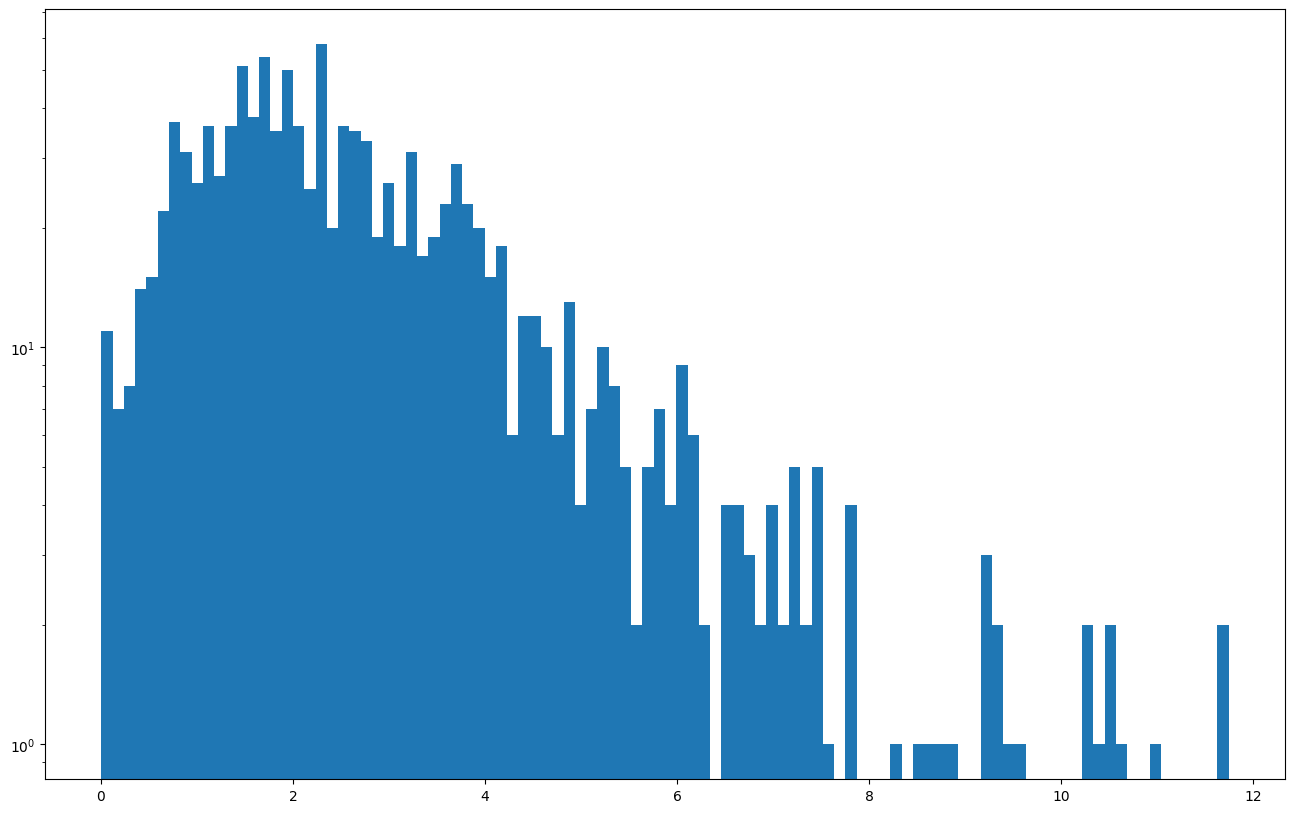

In [70]:
plt.figure(figsize=(16,10))
plt.hist(result["bayes.universe.redshift"], bins=100)
plt.yscale("log")
plt.show()

In [78]:
bagpipes = glob("/home/tim-dewachter/Documents/Thèse/CAPERS/bagpipes_16_01/*.cat")
bagpipes = [pd.read_csv(_, sep=" ") for _ in bagpipes]

In [83]:
bag = pd.concat(bagpipes)
bag = bag.rename(columns={"ID" : "id"})

In [84]:
bag

,id,z_bp,z_err_u,z_err_l
0,299,0.102098,0.001107,0.001069
1,501,1.917280,0.001318,0.001388
2,1279,1.037309,0.000288,0.000318
3,1294,2.288542,0.001127,0.001050
4,1395,1.339782,0.001120,0.001057
...,...,...,...,...
379,108988,4.905745,0.000128,0.000136
380,109375,4.879395,0.001930,0.001909
381,23731,10.222275,3.534052,4.296480
382,111589,14.459018,0.312644,0.731523


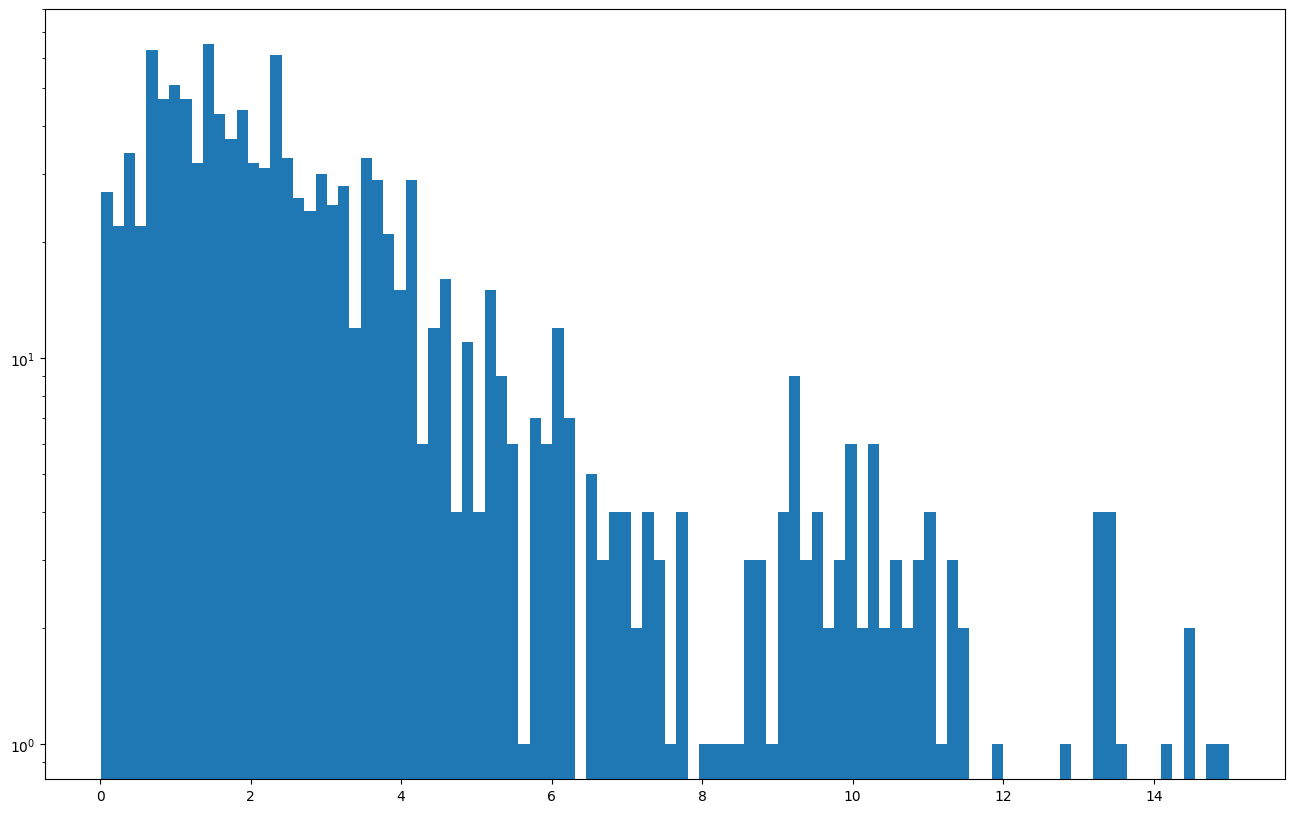

In [85]:
plt.figure(figsize=(16,10))
plt.hist(bag["z_bp"], bins=100)
plt.yscale("log")
plt.show()

In [92]:
merged = bag.merge(
				result, on="id", how="outer", suffixes=("_bag", "_cigale")
			)
merged

,id,z_bp,z_err_u,z_err_l,bayes.universe.redshift,bayes.universe.redshift_err,best.universe.redshift,best.chi_square,best.reduced_chi_square
0,299,0.102098,0.001107,0.001069,0.791351,2.239109e-02,0.78,252.542728,0.618977
1,501,1.917280,0.001318,0.001388,1.906040,1.441801e-02,1.89,178.607127,0.433512
2,1279,1.037309,0.000288,0.000318,1.040000,9.103061e-11,1.04,154.602581,0.374340
3,1294,2.288542,0.001127,0.001050,2.289998,1.400990e-04,2.29,430.845574,1.048286
4,1395,1.339782,0.001120,0.001057,1.340000,7.918913e-06,1.34,294.344255,0.719668
...,...,...,...,...,...,...,...,...,...
1191,158839,2.477400,0.001981,0.002559,NaN,NaN,NaN,NaN,NaN
1192,159638,1.528724,0.102005,0.024541,NaN,NaN,NaN,NaN,NaN
1193,159732,1.274925,0.013393,0.382361,NaN,NaN,NaN,NaN,NaN
1194,159920,0.053645,3.036015,0.006537,NaN,NaN,NaN,NaN,NaN


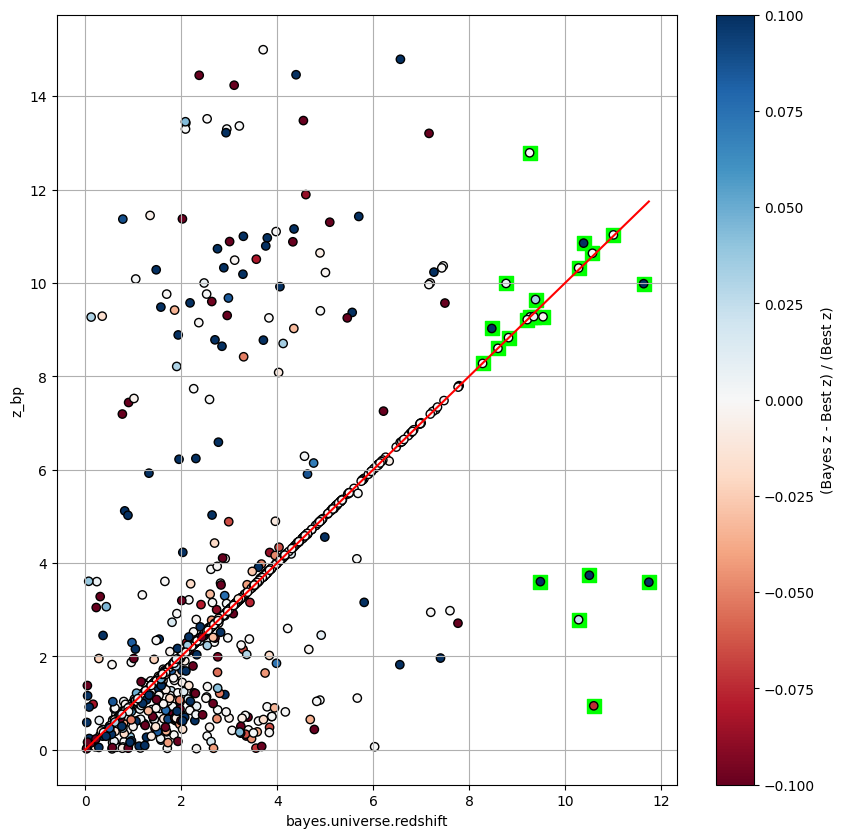

In [115]:
plt.figure(figsize=(10,10))
plt.grid()
dz =  (merged["bayes.universe.redshift"] - merged["best.universe.redshift"]) / merged["best.universe.redshift"]
y = merged["z_bp"]
x = merged["bayes.universe.redshift"]

cmap = plt.get_cmap('RdBu')
norm = mcolors.TwoSlopeNorm(vmin=min(dz), vcenter=0, vmax=max(dz))
sc = plt.scatter(x, y, c=dz, cmap=cmap, norm=norm, edgecolor='k')
cbar = plt.colorbar(sc)
cbar.set_label('(Bayes z - Best z) / (Best z)')

plt.ylabel("z_bp")
plt.xlabel("bayes.universe.redshift")
Z = np.linspace(0, x.max(), 2)
plt.plot(Z,Z, color='r')

keep_y = y[x>8]
keep_x = x[x>8]

plt.scatter(keep_x, keep_y, marker="s", zorder=-1, s=100, color='lime')

plt.show()

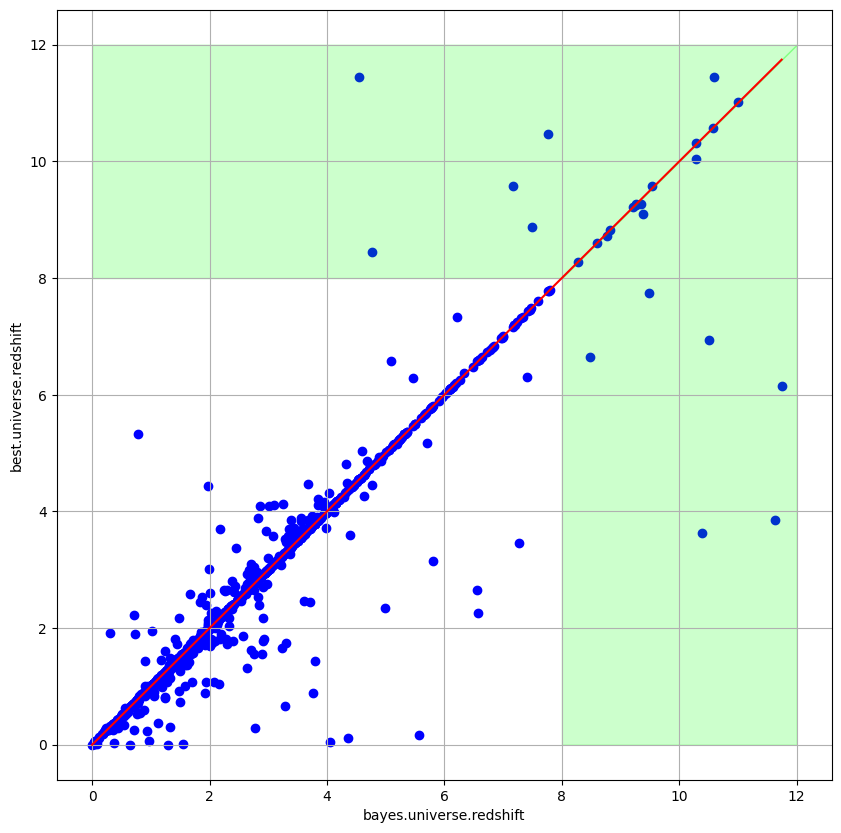

In [134]:
plt.figure(figsize=(10,10))
plt.grid()
dz =  (merged["bayes.universe.redshift"] - merged["best.universe.redshift"]) / merged["best.universe.redshift"]
y = merged["best.universe.redshift"]
x = merged["bayes.universe.redshift"]

plt.ylabel("best.universe.redshift")
plt.xlabel("bayes.universe.redshift")
Z = np.linspace(0, x.max(), 2)
plt.plot(Z,Z, color='r')
plt.scatter(x, y, color='blue')
plt.fill_between((8,12),(0,0),(8,12), color='lime', alpha=0.2)
plt.fill_between((0,8,12),(8,8,12),(12,12,12), color='lime', alpha=0.2)

plt.show()

20
21


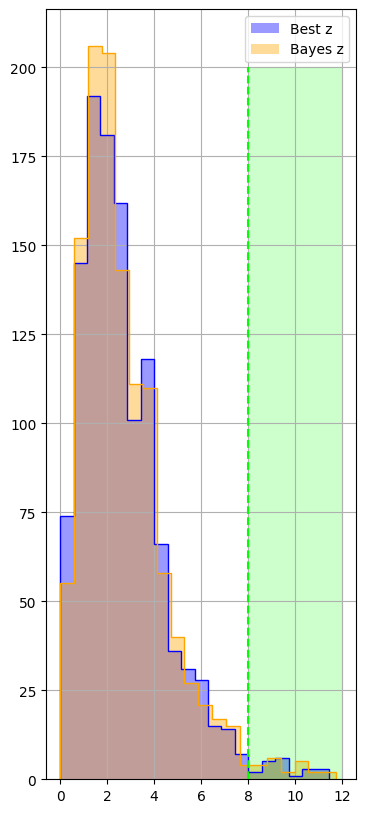

In [130]:
x = merged["best.universe.redshift"]
print((x >= 8).sum())

x = merged["bayes.universe.redshift"]
print((x >= 8).sum())

plt.figure(figsize=(4,10))
plt.grid()

x = merged["best.universe.redshift"]
plt.hist(x, bins=20, histtype='step', fill=False, color='blue')
plt.hist(x, bins=20, label="Best z", color='blue', alpha=0.4)
x = merged["bayes.universe.redshift"]
plt.hist(x, bins=20, histtype='step', fill=False, color='orange')
plt.hist(x, bins=20, label="Bayes z", color='orange', alpha=0.4)
plt.legend()

plt.vlines(8, 0, 200, color='lime', linestyles='dashed')
plt.fill_between((8,12), (0,0), (200,200), color='lime', alpha=0.2)

plt.show()


In [131]:
x = merged["bayes.universe.redshift"]
merged[x>=8]

,id,z_bp,z_err_u,z_err_l,bayes.universe.redshift,bayes.universe.redshift_err,best.universe.redshift,best.chi_square,best.reduced_chi_square
255,13189,8.275199,0.000751,0.000860,8.279816,1.343944e-03,8.28,472.761259,1.244109
433,22431,9.272081,0.000571,0.000468,9.270000,1.648406e-17,9.27,648.010733,1.737294
542,27926,9.643759,3.703742,4.588665,9.382849,6.793881e+00,9.09,259.458627,5.405388
546,28597,9.212782,0.001226,0.001420,9.210000,3.408150e-12,9.21,469.495339,1.275803
635,82699,10.318421,0.007943,0.007749,10.280517,1.834547e-01,10.32,151.387169,0.571272
655,89601,8.826956,0.001972,0.001823,8.820000,2.899205e-06,8.82,309.539643,0.913096
672,95095,9.983008,3.505978,4.576306,11.635938,6.379060e+00,3.86,9.619814,0.687130
689,98574,0.940427,0.147465,0.132785,10.596180,1.318118e+00,11.44,156.911306,0.651084
801,114291,3.600803,0.007420,0.006094,9.484176,7.089893e+00,7.75,483.918961,2.076905
855,119518,3.588002,0.005128,0.005642,11.744401,7.061944e+00,6.15,555.061621,1.934013


In [164]:
merged[np.round(merged["bayes.universe.redshift"],2) == 1.75]

,id,z_bp,z_err_u,z_err_l,bayes.universe.redshift,bayes.universe.redshift_err,best.universe.redshift,best.chi_square,best.reduced_chi_square
95,6543,1.763638,0.001248,0.001082,1.750193,1.454893e-03,1.75,255.908644,0.622649
406,19309,1.750682,0.000216,0.000221,1.750000,2.303092e-16,1.75,158.661872,0.385102


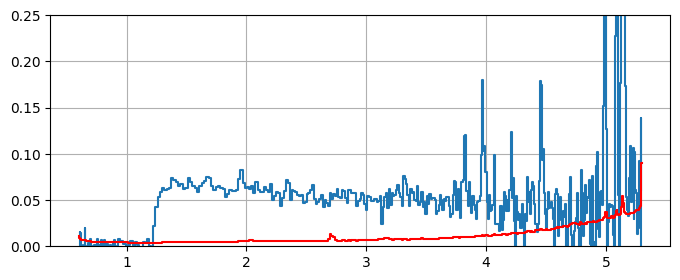

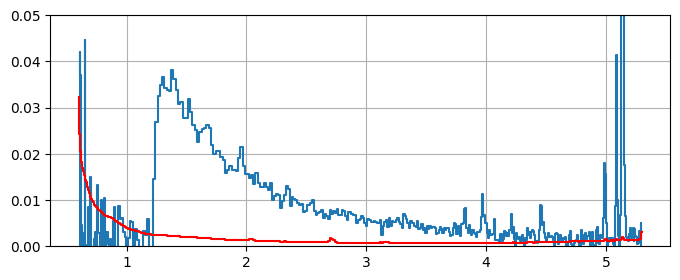

In [184]:
path = "/home/tim-dewachter/Documents/Thèse/CAPERS/V0.1/CAPERS_UDS_V0.1/P1/CAPERS_UDS_P1_s000022431_x1d.fits"
with fits.open(path) as hdulist:
	x1d = Table(hdulist[1].data)

plt.figure(figsize=(8,3))
l,f,err = x1d["WAVELENGTH"],x1d["FLUX"],x1d["FLUX_ERROR"]
mask = f>-1000
l = l[mask]
f = f[mask]
err = err[mask]
f *= 1e6
err *= 1e6

plt.step(l,f)
plt.step(l,err, color='r')
plt.grid()
plt.ylim(0,0.25)
plt.show()

plt.figure(figsize=(8,3))
fn = f/l**2
errn = err/l**2
plt.step(l,fn)
plt.step(l,errn, color='r')
plt.grid()
plt.ylim(0,0.05)
plt.show()


1196
1196


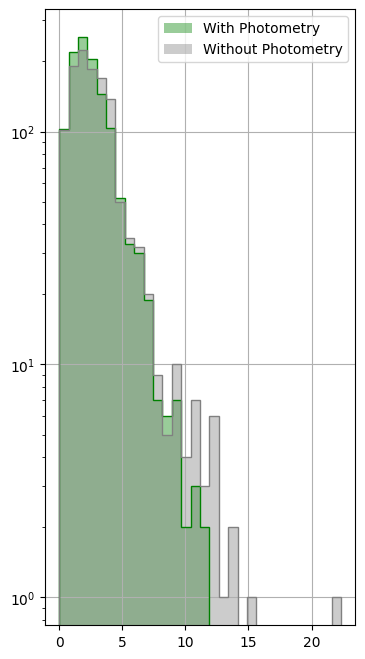

In [182]:
old_cig = pd.read_csv("/home/tim-dewachter/Documents/Thèse/CAPERS/run_cigale_18_01/CAPERS_v0.1_cigale_redshift.csv", sep=";")

plt.figure(figsize=(4,8))
x = merged["best.universe.redshift"]
print(len(x))
plt.hist(x, bins=30, histtype='step', fill=False, color='green', range=(0,np.nanmax(old_cig["best.universe.redshift"])))
plt.hist(x, bins=30, label="With Photometry", color='green', alpha=0.4, range=(0,np.nanmax(old_cig["best.universe.redshift"])))
x = old_cig["best.universe.redshift"]
print(len(x))
plt.hist(x, bins=30, histtype='step', fill=False, color='gray', range=(0,np.nanmax(old_cig["best.universe.redshift"])))
plt.hist(x, bins=30, label="Without Photometry", color='gray', alpha=0.4, range=(0,np.nanmax(old_cig["best.universe.redshift"])))
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()
